In [271]:
import numpy as np
import matplotlib.pyplot as plt

In [272]:
l1 = 5
l2 = 10


p0 = np.array([0.0,0.0,0.0])

ang1 = 90*np.pi/180
ang2 = -35*np.pi/180

R1 = np.array([[1, 0, 0], [0, np.cos(ang1), -np.sin(ang1)], [0, np.sin(ang1), np.cos(ang1)] ])
p1 = R1.dot(np.array([0, 5, 0]))
print p1

R2 = np.array([[1, 0, 0], [0, np.cos(ang2), -np.sin(ang2)], [0, np.sin(ang2), np.cos(ang2)] ])

p2_0 = np.array([0, 15, 0.0])
p2_1 = p2_0 - np.array([0, 5, 0])

p2_temp = R2.dot(p2_1) + np.array([0, 5, 0])

p2 = R1.dot(p2_temp)

print p2

p3 = np.array([-10, 0, 0])






[0.000000e+00 3.061617e-16 5.000000e+00]
[ 0.          5.73576436 13.19152044]


In [273]:
def Functions_4_minimize(s):
    x = s[0]
    y = s[1]
    z = s[2]
    
    F = empty((3))
    
    F[0] = pow(p2[0] - x, 2) + pow(p2[1] - y, 2) + pow(p2[2] - z, 2) - 125
    F[1] = pow(p1[0] - x, 2) + pow(p1[1] - y, 2) + pow(p1[2] - z, 2) - 125
    F[2] = pow(p3[0] - x, 2) + pow(p3[1] - y, 2) + pow(p3[2] - z, 2) - 100
    
    return F[0]**2+F[1]**2+F[2]**2

p4_min = minimize(Functions_4_minimize, sGuess, method='Nelder-Mead', tol=10)

print p4_min
p4 = p4_min.x
print p4

 final_simplex: (array([[-9.54048829,  5.68574508,  7.76428676],
       [-9.52956583,  5.55372146,  7.80635476],
       [-9.63936194,  5.56787703,  8.04975552],
       [-9.44224796,  5.73770948,  7.94951791]]), array([107.83413037, 111.03687883, 115.67518004, 116.11777523]))
           fun: 107.83413036622694
       message: 'Optimization terminated successfully.'
          nfev: 59
           nit: 32
        status: 0
       success: True
             x: array([-9.54048829,  5.68574508,  7.76428676])
[-9.54048829  5.68574508  7.76428676]


In [274]:
p5 = np.array([p4[0], -p4[1], p4[2]])

In [275]:
def Functions_6_minimize(s):
    x = s[0]
    y = s[1]
    z = s[2]
    
    F = empty((3))
    
    F[0] = pow(p4[0] - x, 2) + pow(p4[1] - y, 2) + pow(p4[2] - z, 2) - (125+10)
    F[1] = pow(p3[0] - x, 2) + pow(p3[1] - y, 2) + pow(p3[2] - z, 2) - 125
    F[2] = y-5
#     F[4] = y6 - y7 -10
    return F[0]**2 + F[1]**2 + 4000*F[2]**2

sGuess = np.array([-8, 5, -10])

cons = ({'type': 'ineq', 'fun': lambda x:  -x[2] })
p6_min = minimize(Functions_6_minimize, sGuess, method='L-BFGS-B', tol=10, constraints=cons)

print p6_min
p6 = np.array(p6_min.x)
print p6

      fun: 22346.755820129678
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([  749.95296018,  -434.30591177, -9437.46854318])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 8
      nit: 1
   status: 0
  success: True
        x: array([-8.08770755,  5.03193034, -9.00436561])
[-8.08770755  5.03193034 -9.00436561]


In [276]:
M18 = np.array([[1, 0,0], [0, -1, 0], [0, 0, 1]])
p8 = M18.dot(p1)
p9 = M18.dot(p2)
p5 = M18.dot(p4)
p7 = M18.dot(p6)

p10 = p3 + 2*(0.5*(p6 + p7) - p3)

p0 = np.array([0,0,0])
p = np.stack((p0, p1, p2, p3, p4, p5, p6, p7, p8, p9, p10), axis=1)
p = p.transpose()

print p


[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  3.06161700e-16  5.00000000e+00]
 [ 0.00000000e+00  5.73576436e+00  1.31915204e+01]
 [-1.00000000e+01  0.00000000e+00  0.00000000e+00]
 [-9.54048829e+00  5.68574508e+00  7.76428676e+00]
 [-9.54048829e+00 -5.68574508e+00  7.76428676e+00]
 [-8.08770755e+00  5.03193034e+00 -9.00436561e+00]
 [-8.08770755e+00 -5.03193034e+00 -9.00436561e+00]
 [ 0.00000000e+00 -3.06161700e-16  5.00000000e+00]
 [ 0.00000000e+00 -5.73576436e+00  1.31915204e+01]
 [-6.17541510e+00  0.00000000e+00 -1.80087312e+01]]


<IPython.core.display.Javascript object>


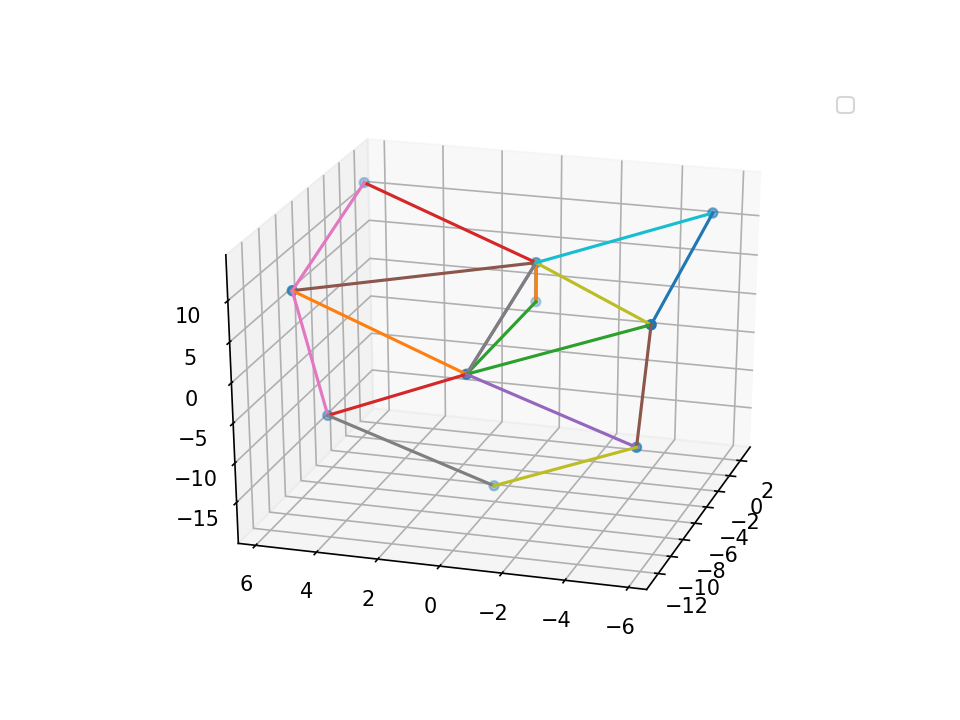

In [277]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D

%matplotlib notebook

mpl.rcParams['legend.fontsize'] = 10

fig = plt.figure()
ax = fig.gca(projection='3d')

# ax.plot(x, y, z, label='parametric curve')

ax.scatter3D(p[:, 0], p[:, 1], p[:, 2],)

ind = np.array([0, 1])
seg = p[ind]
ax.plot(seg[:, 0], seg[:, 1], seg[:, 2])

ind = np.array([0, 8])
seg = p[ind]
ax.plot(seg[:, 0], seg[:, 1], seg[:, 2])

ind = np.array([0, 3])
seg = p[ind]
ax.plot(seg[:, 0], seg[:, 1], seg[:, 2])

ind = np.array([1, 2])
seg = p[ind]
ax.plot(seg[:, 0], seg[:, 1], seg[:, 2])

ind = np.array([1, 3])
seg = p[ind]
ax.plot(seg[:, 0], seg[:, 1], seg[:, 2])

ind = np.array([1, 4])
seg = p[ind]
ax.plot(seg[:, 0], seg[:, 1], seg[:, 2])

ind = np.array([2, 4])
seg = p[ind]
ax.plot(seg[:, 0], seg[:, 1], seg[:, 2])

ind = np.array([8, 3])
seg = p[ind]
ax.plot(seg[:, 0], seg[:, 1], seg[:, 2])

ind = np.array([8, 5])
seg = p[ind]
ax.plot(seg[:, 0], seg[:, 1], seg[:, 2])

ind = np.array([8, 9])
seg = p[ind]
ax.plot(seg[:, 0], seg[:, 1], seg[:, 2])

ind = np.array([9, 5])
seg = p[ind]
ax.plot(seg[:, 0], seg[:, 1], seg[:, 2])

ind = np.array([3, 4])
seg = p[ind]
ax.plot(seg[:, 0], seg[:, 1], seg[:, 2])

ind = np.array([3, 5])
seg = p[ind]
ax.plot(seg[:, 0], seg[:, 1], seg[:, 2])

ind = np.array([3, 6])
seg = p[ind]
ax.plot(seg[:, 0], seg[:, 1], seg[:, 2])

ind = np.array([3, 7])
seg = p[ind]
ax.plot(seg[:, 0], seg[:, 1], seg[:, 2])

ind = np.array([5, 7])
seg = p[ind]
ax.plot(seg[:, 0], seg[:, 1], seg[:, 2])
ind = np.array([4, 6])
seg = p[ind]
ax.plot(seg[:, 0], seg[:, 1], seg[:, 2])

ind = np.array([6, 10])
seg = p[ind]
ax.plot(seg[:, 0], seg[:, 1], seg[:, 2])

ind = np.array([7, 10])
seg = p[ind]
ax.plot(seg[:, 0], seg[:, 1], seg[:, 2])


ax.legend()
ax.axis('equal')

plt.show()